<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906


0:	learn: 0.9737971	total: 58.4ms	remaining: 58.4s
1:	learn: 0.9411695	total: 59.3ms	remaining: 29.6s
2:	learn: 0.9136345	total: 59.8ms	remaining: 19.9s
3:	learn: 0.8831142	total: 60.5ms	remaining: 15.1s
4:	learn: 0.8582868	total: 61ms	remaining: 12.1s
5:	learn: 0.8301704	total: 62.2ms	remaining: 10.3s
6:	learn: 0.8076683	total: 62.8ms	remaining: 8.91s
7:	learn: 0.7842580	total: 69.4ms	remaining: 8.6s
8:	learn: 0.7581079	total: 70.1ms	remaining: 7.71s
9:	learn: 0.7344628	total: 71.4ms	remaining: 7.07s
10:	learn: 0.7113881	total: 72.5ms	remaining: 6.51s
11:	learn: 0.6894511	total: 73ms	remaining: 6.01s
12:	learn: 0.6676018	total: 84.1ms	remaining: 6.39s
13:	learn: 0.6472504	total: 85.3ms	remaining: 6.01s
14:	learn: 0.6271193	total: 86.8ms	remaining: 5.7s
15:	learn: 0.6066775	total: 87.2ms	remaining: 5.37s
16:	learn: 0.5875325	total: 88.5ms	remaining: 5.12s
17:	learn: 0.5705978	total: 88.8ms	remaining: 4.84s
18:	learn: 0.5545616	total: 91.4ms	remaining: 4.72s
19:	learn: 0.5384598	total: 

77:	learn: 0.1171512	total: 170ms	remaining: 2.01s
78:	learn: 0.1147763	total: 171ms	remaining: 1.99s
79:	learn: 0.1128731	total: 171ms	remaining: 1.97s
80:	learn: 0.1103703	total: 172ms	remaining: 1.95s
81:	learn: 0.1088700	total: 173ms	remaining: 1.93s
82:	learn: 0.1070508	total: 173ms	remaining: 1.91s
83:	learn: 0.1053559	total: 174ms	remaining: 1.89s
84:	learn: 0.1031045	total: 174ms	remaining: 1.88s
85:	learn: 0.1015328	total: 176ms	remaining: 1.87s
86:	learn: 0.1000725	total: 177ms	remaining: 1.85s
87:	learn: 0.0976009	total: 177ms	remaining: 1.84s
88:	learn: 0.0955371	total: 178ms	remaining: 1.82s
89:	learn: 0.0936763	total: 179ms	remaining: 1.8s
90:	learn: 0.0917529	total: 179ms	remaining: 1.79s
91:	learn: 0.0903390	total: 180ms	remaining: 1.77s
92:	learn: 0.0886160	total: 180ms	remaining: 1.76s
93:	learn: 0.0870282	total: 181ms	remaining: 1.75s
94:	learn: 0.0856989	total: 182ms	remaining: 1.73s
95:	learn: 0.0839890	total: 183ms	remaining: 1.72s
96:	learn: 0.0830308	total: 184m

132:	learn: 0.0544278	total: 217ms	remaining: 1.42s
133:	learn: 0.0540057	total: 219ms	remaining: 1.42s
134:	learn: 0.0536601	total: 220ms	remaining: 1.41s
135:	learn: 0.0531835	total: 221ms	remaining: 1.4s
136:	learn: 0.0528071	total: 221ms	remaining: 1.39s
137:	learn: 0.0522662	total: 222ms	remaining: 1.38s
138:	learn: 0.0519071	total: 222ms	remaining: 1.38s
139:	learn: 0.0515513	total: 222ms	remaining: 1.37s
140:	learn: 0.0511309	total: 223ms	remaining: 1.36s
141:	learn: 0.0507101	total: 225ms	remaining: 1.36s
142:	learn: 0.0503851	total: 225ms	remaining: 1.35s
143:	learn: 0.0501411	total: 226ms	remaining: 1.34s
144:	learn: 0.0498910	total: 227ms	remaining: 1.34s
145:	learn: 0.0494366	total: 227ms	remaining: 1.33s
146:	learn: 0.0491770	total: 228ms	remaining: 1.32s
147:	learn: 0.0488266	total: 229ms	remaining: 1.32s
148:	learn: 0.0486510	total: 230ms	remaining: 1.31s
149:	learn: 0.0483379	total: 231ms	remaining: 1.31s
150:	learn: 0.0479578	total: 231ms	remaining: 1.3s
151:	learn: 0.

217:	learn: 0.0360555	total: 319ms	remaining: 1.14s
218:	learn: 0.0359439	total: 320ms	remaining: 1.14s
219:	learn: 0.0358688	total: 321ms	remaining: 1.14s
220:	learn: 0.0357235	total: 322ms	remaining: 1.14s
221:	learn: 0.0356119	total: 323ms	remaining: 1.13s
222:	learn: 0.0354990	total: 324ms	remaining: 1.13s
223:	learn: 0.0354015	total: 324ms	remaining: 1.12s
224:	learn: 0.0352879	total: 325ms	remaining: 1.12s
225:	learn: 0.0352242	total: 325ms	remaining: 1.11s
226:	learn: 0.0349874	total: 325ms	remaining: 1.11s
227:	learn: 0.0348133	total: 326ms	remaining: 1.1s
228:	learn: 0.0346254	total: 327ms	remaining: 1.1s
229:	learn: 0.0345028	total: 327ms	remaining: 1.1s
230:	learn: 0.0344021	total: 328ms	remaining: 1.09s
231:	learn: 0.0343045	total: 329ms	remaining: 1.09s
232:	learn: 0.0342324	total: 330ms	remaining: 1.09s
233:	learn: 0.0341563	total: 332ms	remaining: 1.08s
234:	learn: 0.0340784	total: 332ms	remaining: 1.08s
235:	learn: 0.0339281	total: 334ms	remaining: 1.08s
236:	learn: 0.0

290:	learn: 0.0284253	total: 365ms	remaining: 890ms
291:	learn: 0.0283228	total: 366ms	remaining: 886ms
292:	learn: 0.0282460	total: 366ms	remaining: 883ms
293:	learn: 0.0281795	total: 367ms	remaining: 880ms
294:	learn: 0.0281069	total: 367ms	remaining: 877ms
295:	learn: 0.0280128	total: 367ms	remaining: 874ms
296:	learn: 0.0279069	total: 368ms	remaining: 871ms
297:	learn: 0.0278262	total: 368ms	remaining: 868ms
298:	learn: 0.0277432	total: 369ms	remaining: 864ms
299:	learn: 0.0276662	total: 369ms	remaining: 861ms
300:	learn: 0.0276070	total: 369ms	remaining: 857ms
301:	learn: 0.0275542	total: 370ms	remaining: 854ms
302:	learn: 0.0274811	total: 370ms	remaining: 851ms
303:	learn: 0.0274267	total: 370ms	remaining: 848ms
304:	learn: 0.0273889	total: 370ms	remaining: 844ms
305:	learn: 0.0273184	total: 371ms	remaining: 841ms
306:	learn: 0.0272705	total: 371ms	remaining: 838ms
307:	learn: 0.0272382	total: 371ms	remaining: 834ms
308:	learn: 0.0271805	total: 372ms	remaining: 832ms
309:	learn: 

453:	learn: 0.0205927	total: 457ms	remaining: 550ms
454:	learn: 0.0205689	total: 460ms	remaining: 551ms
455:	learn: 0.0205433	total: 461ms	remaining: 550ms
456:	learn: 0.0205320	total: 462ms	remaining: 549ms
457:	learn: 0.0205178	total: 462ms	remaining: 547ms
458:	learn: 0.0204783	total: 463ms	remaining: 545ms
459:	learn: 0.0204550	total: 463ms	remaining: 543ms
460:	learn: 0.0204252	total: 463ms	remaining: 542ms
461:	learn: 0.0203667	total: 463ms	remaining: 540ms
462:	learn: 0.0203408	total: 464ms	remaining: 538ms
463:	learn: 0.0202960	total: 468ms	remaining: 540ms
464:	learn: 0.0202704	total: 468ms	remaining: 538ms
465:	learn: 0.0202471	total: 469ms	remaining: 537ms
466:	learn: 0.0202205	total: 469ms	remaining: 536ms
467:	learn: 0.0201918	total: 470ms	remaining: 534ms
468:	learn: 0.0201732	total: 470ms	remaining: 532ms
469:	learn: 0.0201490	total: 471ms	remaining: 531ms
470:	learn: 0.0201316	total: 472ms	remaining: 530ms
471:	learn: 0.0200977	total: 473ms	remaining: 529ms
472:	learn: 

533:	learn: 0.0184982	total: 503ms	remaining: 439ms
534:	learn: 0.0184772	total: 503ms	remaining: 437ms
535:	learn: 0.0184558	total: 503ms	remaining: 436ms
536:	learn: 0.0184461	total: 503ms	remaining: 434ms
537:	learn: 0.0184277	total: 506ms	remaining: 435ms
538:	learn: 0.0184091	total: 507ms	remaining: 433ms
539:	learn: 0.0183744	total: 507ms	remaining: 432ms
540:	learn: 0.0183535	total: 507ms	remaining: 430ms
541:	learn: 0.0183259	total: 507ms	remaining: 429ms
542:	learn: 0.0183102	total: 508ms	remaining: 427ms
543:	learn: 0.0182894	total: 508ms	remaining: 426ms
544:	learn: 0.0182738	total: 508ms	remaining: 424ms
545:	learn: 0.0182556	total: 509ms	remaining: 423ms
546:	learn: 0.0182339	total: 509ms	remaining: 421ms
547:	learn: 0.0182086	total: 509ms	remaining: 420ms
548:	learn: 0.0181936	total: 509ms	remaining: 419ms
549:	learn: 0.0181846	total: 510ms	remaining: 417ms
550:	learn: 0.0181612	total: 510ms	remaining: 416ms
551:	learn: 0.0181355	total: 510ms	remaining: 414ms
552:	learn: 

643:	learn: 0.0162527	total: 603ms	remaining: 333ms
644:	learn: 0.0162410	total: 610ms	remaining: 336ms
645:	learn: 0.0162241	total: 614ms	remaining: 337ms
646:	learn: 0.0162141	total: 616ms	remaining: 336ms
647:	learn: 0.0161955	total: 618ms	remaining: 336ms
648:	learn: 0.0161785	total: 620ms	remaining: 335ms
649:	learn: 0.0161685	total: 620ms	remaining: 334ms
650:	learn: 0.0161585	total: 621ms	remaining: 333ms
651:	learn: 0.0161482	total: 622ms	remaining: 332ms
652:	learn: 0.0161302	total: 622ms	remaining: 330ms
653:	learn: 0.0160791	total: 622ms	remaining: 329ms
654:	learn: 0.0160646	total: 622ms	remaining: 328ms
655:	learn: 0.0160540	total: 623ms	remaining: 327ms
656:	learn: 0.0160292	total: 624ms	remaining: 326ms
657:	learn: 0.0160181	total: 625ms	remaining: 325ms
658:	learn: 0.0160029	total: 626ms	remaining: 324ms
659:	learn: 0.0159900	total: 627ms	remaining: 323ms
660:	learn: 0.0159615	total: 627ms	remaining: 322ms
661:	learn: 0.0159448	total: 628ms	remaining: 321ms
662:	learn: 

693:	learn: 0.0154179	total: 656ms	remaining: 289ms
694:	learn: 0.0154077	total: 657ms	remaining: 289ms
695:	learn: 0.0153975	total: 659ms	remaining: 288ms
696:	learn: 0.0153862	total: 660ms	remaining: 287ms
697:	learn: 0.0153745	total: 661ms	remaining: 286ms
698:	learn: 0.0153609	total: 661ms	remaining: 285ms
699:	learn: 0.0153436	total: 662ms	remaining: 284ms
700:	learn: 0.0153377	total: 662ms	remaining: 282ms
701:	learn: 0.0153228	total: 662ms	remaining: 281ms
702:	learn: 0.0153089	total: 663ms	remaining: 280ms
703:	learn: 0.0152935	total: 665ms	remaining: 280ms
704:	learn: 0.0152783	total: 667ms	remaining: 279ms
705:	learn: 0.0152692	total: 668ms	remaining: 278ms
706:	learn: 0.0152506	total: 668ms	remaining: 277ms
707:	learn: 0.0152449	total: 669ms	remaining: 276ms
708:	learn: 0.0152305	total: 670ms	remaining: 275ms
709:	learn: 0.0152188	total: 670ms	remaining: 274ms
710:	learn: 0.0152058	total: 673ms	remaining: 274ms
711:	learn: 0.0152003	total: 676ms	remaining: 274ms
712:	learn: 

782:	learn: 0.0143510	total: 736ms	remaining: 204ms
783:	learn: 0.0143424	total: 737ms	remaining: 203ms
784:	learn: 0.0143360	total: 740ms	remaining: 203ms
785:	learn: 0.0142947	total: 741ms	remaining: 202ms
786:	learn: 0.0142831	total: 746ms	remaining: 202ms
787:	learn: 0.0142742	total: 747ms	remaining: 201ms
788:	learn: 0.0142556	total: 750ms	remaining: 201ms
789:	learn: 0.0142404	total: 750ms	remaining: 199ms
790:	learn: 0.0142263	total: 750ms	remaining: 198ms
791:	learn: 0.0142172	total: 751ms	remaining: 197ms
792:	learn: 0.0142047	total: 751ms	remaining: 196ms
793:	learn: 0.0141977	total: 755ms	remaining: 196ms
794:	learn: 0.0141882	total: 756ms	remaining: 195ms
795:	learn: 0.0141752	total: 757ms	remaining: 194ms
796:	learn: 0.0141683	total: 757ms	remaining: 193ms
797:	learn: 0.0141611	total: 757ms	remaining: 192ms
798:	learn: 0.0141530	total: 758ms	remaining: 191ms
799:	learn: 0.0141306	total: 758ms	remaining: 190ms
800:	learn: 0.0141127	total: 759ms	remaining: 188ms
801:	learn: 

828:	learn: 0.0138225	total: 780ms	remaining: 161ms
829:	learn: 0.0137839	total: 783ms	remaining: 160ms
830:	learn: 0.0137743	total: 784ms	remaining: 159ms
831:	learn: 0.0137680	total: 784ms	remaining: 158ms
832:	learn: 0.0137606	total: 784ms	remaining: 157ms
833:	learn: 0.0137495	total: 785ms	remaining: 156ms
834:	learn: 0.0137333	total: 785ms	remaining: 155ms
835:	learn: 0.0137234	total: 785ms	remaining: 154ms
836:	learn: 0.0136840	total: 786ms	remaining: 153ms
837:	learn: 0.0136760	total: 787ms	remaining: 152ms
838:	learn: 0.0136626	total: 788ms	remaining: 151ms
839:	learn: 0.0136537	total: 789ms	remaining: 150ms
840:	learn: 0.0136463	total: 790ms	remaining: 149ms
841:	learn: 0.0136270	total: 790ms	remaining: 148ms
842:	learn: 0.0136180	total: 790ms	remaining: 147ms
843:	learn: 0.0136135	total: 792ms	remaining: 146ms
844:	learn: 0.0136065	total: 793ms	remaining: 145ms
845:	learn: 0.0135947	total: 793ms	remaining: 144ms
846:	learn: 0.0135909	total: 793ms	remaining: 143ms
847:	learn: 

948:	learn: 0.0123892	total: 886ms	remaining: 47.6ms
949:	learn: 0.0123785	total: 888ms	remaining: 46.7ms
950:	learn: 0.0123671	total: 889ms	remaining: 45.8ms
951:	learn: 0.0123391	total: 890ms	remaining: 44.9ms
952:	learn: 0.0123348	total: 897ms	remaining: 44.2ms
953:	learn: 0.0123281	total: 903ms	remaining: 43.5ms
954:	learn: 0.0123198	total: 905ms	remaining: 42.7ms
955:	learn: 0.0123114	total: 906ms	remaining: 41.7ms
956:	learn: 0.0123022	total: 908ms	remaining: 40.8ms
957:	learn: 0.0122974	total: 910ms	remaining: 39.9ms


958:	learn: 0.0122908	total: 940ms	remaining: 40.2ms
959:	learn: 0.0122633	total: 942ms	remaining: 39.2ms
960:	learn: 0.0122570	total: 943ms	remaining: 38.3ms
961:	learn: 0.0122474	total: 944ms	remaining: 37.3ms
962:	learn: 0.0122413	total: 946ms	remaining: 36.3ms
963:	learn: 0.0122283	total: 947ms	remaining: 35.4ms
964:	learn: 0.0122156	total: 948ms	remaining: 34.4ms
965:	learn: 0.0122084	total: 948ms	remaining: 33.4ms
966:	learn: 0.0121823	total: 949ms	remaining: 32.4ms
967:	learn: 0.0121765	total: 950ms	remaining: 31.4ms
968:	learn: 0.0121719	total: 950ms	remaining: 30.4ms
969:	learn: 0.0121640	total: 950ms	remaining: 29.4ms
970:	learn: 0.0121573	total: 951ms	remaining: 28.4ms
971:	learn: 0.0121506	total: 951ms	remaining: 27.4ms
972:	learn: 0.0121405	total: 951ms	remaining: 26.4ms
973:	learn: 0.0121321	total: 951ms	remaining: 25.4ms
974:	learn: 0.0121264	total: 952ms	remaining: 24.4ms
975:	learn: 0.0121181	total: 952ms	remaining: 23.4ms
976:	learn: 0.0121128	total: 953ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.023028404161414953
ABC Pre-generator MAE 0.11209344785351506


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

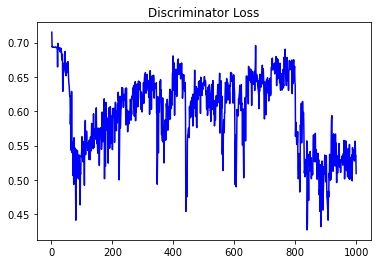

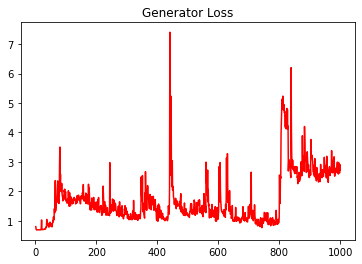

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.18521324799432382


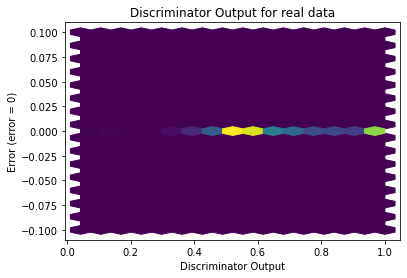

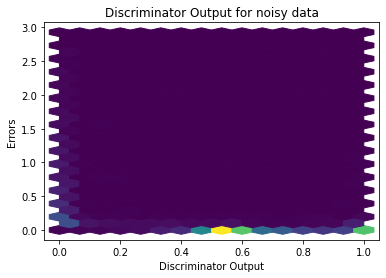

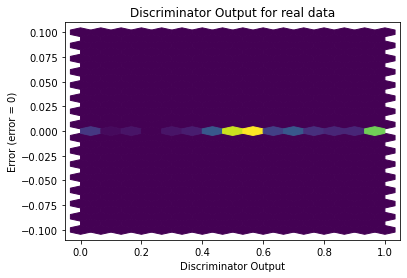

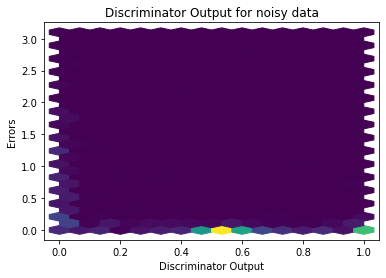

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())